In [412]:
# Import libraries and dependencies
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
from MCForecastTools import MCSimulation
from pathlib import Path

In [340]:
# Set the path for each CSV file
arkk_path = Path("C:/Users/teruy/Documents/GitHub/Project-1-Work/Resources/ARKK_new.csv")
gbtc_path = Path("C:/Users/teruy/Documents/GitHub/Project-1-Work/Resources/GBTC_new.csv")
sp500_path = Path("C:/Users/teruy/Documents/GitHub/Project-1-Work/Resources/SP500_new.csv")
nasdaq_path = Path("C:/Users/teruy/Documents/GitHub/Project-1-Work/Resources/NASDAQ_new.csv")


# Read in the data into Pandas DataFrames
arkkdata = pd.read_csv(arkk_path, parse_dates=True, infer_datetime_format=True)
gbtcdata = pd.read_csv(gbtc_path, parse_dates=True, infer_datetime_format=True)
sp500data = pd.read_csv(sp500_path, parse_dates=True, infer_datetime_format=True)
nasdaqdata = pd.read_csv(nasdaq_path, parse_dates=True, infer_datetime_format=True)

In [341]:
# Filter DataFrames by Date Range
arkkdata = arkkdata[(arkkdata['Date'] > "2019-01-01") & (arkkdata['Date'] < "2022-07-01")]
gbtcdata = gbtcdata[(gbtcdata['Date'] > "2019-01-01") & (gbtcdata['Date'] < "2022-07-01")]
sp500data = sp500data[(sp500data['Date'] > "2019-01-01") & (sp500data['Date'] < "2022-07-01")]
nasdaqdata = nasdaqdata[(nasdaqdata['Date'] > "2019-01-01") & (nasdaqdata['Date'] < "2022-07-01")]

In [342]:
# Drop DataFrames columns
arkkdata.drop('Adj Close', inplace=True, axis=1)
arkkdata.drop('Volume', inplace=True, axis=1)

gbtcdata.drop('Adj Close', inplace=True, axis=1)
gbtcdata.drop('Volume', inplace=True, axis=1)

sp500data.drop('Adj Close', inplace=True, axis=1)
sp500data.drop('Volume', inplace=True, axis=1)

nasdaqdata.drop('Adj Close', inplace=True, axis=1)
nasdaqdata.drop('Volume', inplace=True, axis=1)

In [343]:
# Convert Column data from string to float
cols = arkkdata.columns
for col in cols:
    if col != 'Date':
        arkkdata[col] = arkkdata[col].astype(float)

cols = gbtcdata.columns
for col in cols:
    if col != 'Date':
        gbtcdata[col] = gbtcdata[col].astype(float)

cols = sp500data.columns
for col in cols:
    if col != 'Date':
        sp500data[col] = sp500data[col].astype(float)
        
cols = nasdaqdata.columns
for col in cols:
    if col != 'Date':
        nasdaqdata[col] = nasdaqdata[col].astype(float)

In [344]:
# Use Date column as DataFrame index
arkkdata = arkkdata.set_index("Date")
gbtcdata = gbtcdata.set_index("Date")
sp500data = sp500data.set_index("Date")
nasdaqdata = nasdaqdata.set_index("Date")

In [345]:
# Concat 4 DataFrames to 1 DataFrame
df_ticker = pd.concat([arkkdata, gbtcdata, sp500data, nasdaqdata], axis=1, keys=["ARKK","GBTC","SP500","Nasdaq"])
df_ticker = df_ticker.rename(columns={'Close': 'close'})
df_ticker.head()

ARKK                                    GBTC              \
                 Open       High        Low      close   Open  High   Low   
Date                                                                        
2019-01-02  36.270000  37.573002  36.230000  37.419998  4.155  4.65  4.13   
2019-01-03  37.000000  37.140999  35.910000  36.189999  4.325  4.62  4.32   
2019-01-04  36.900002  38.560001  36.860001  38.430000  4.585  4.65  4.41   
2019-01-07  38.669998  40.330002  38.389999  40.099998  4.740  4.94  4.74   
2019-01-08  40.709999  40.830002  39.307999  40.220001  4.895  5.08  4.84   

                    SP500                                  Nasdaq  \
           close     Open     High      Low    close         Open   
Date                                                                
2019-01-02  4.62  2476.96  2519.49  2467.47  2510.03  6506.910156   
2019-01-03  4.52  2491.92  2493.14  2443.96  2447.89  6584.770020   
2019-01-04  4.53  2474.33  2538.07  2474.33  2531.94  6567.140137   
2019-01-07  4.86  2535.61  2566.16  2524.56  2549.69  6757.529785   
2019-01-08  4.96  2568.11  2579.82  2547.56  2574.41  6893.439941   

                                                   
                   High          Low        close  
Date                                               
2019-01-02  6693.709961  6506.879883  6665.939941  
2019-01-03  6600.209961  6457.129883  6463.500000  
2019-01-04  6760.689941  6554.240234  6738.859863  
2019-01-07  6855.600098  6741.399902  6823.470215  
2019-01-08  6909.580078  6795.859863  6897.000000

In [374]:
# Configure a Monte Carlo simulation to forecast thress years cumulative returns
MC_even_dist = MCSimulation(
    portfolio_data = df_ticker,
    weights = [.25,.25,.25,.25],
    num_simulation = 100,
    num_trading_days = 252*3
)

# Print the simulation input data
MC_even_dist.portfolio_data.tail()

ARKK                                                  GBTC  \
                 Open       High        Low      close daily_return    Open   
Date                                                                          
2022-06-24  44.770000  45.990002  43.959999  45.830002     0.040881  13.885   
2022-06-27  45.825001  46.270000  43.580002  44.799999    -0.022474  13.910   
2022-06-28  44.730000  45.369999  42.040001  42.169998    -0.058705  13.600   
2022-06-29  41.889999  42.240002  40.700001  41.509998    -0.015651  13.170   
2022-06-30  40.750000  41.029999  39.110001  39.880001    -0.039268  12.590   

                                                SP500                    \
             High    Low  close daily_return     Open     High      Low   
Date                                                                      
2022-06-24  14.23  13.40  13.85     0.011687  3821.75  3913.65  3821.75   
2022-06-27  13.94  13.15  13.51    -0.024549  3920.76  3927.72  3889.66   
2022-06-28  13.85  13.18  13.25    -0.019245  3913.00  3945.86  3820.14   
2022-06-29  13.38  12.96  13.32     0.005283  3825.09  3836.50  3799.02   
2022-06-30  12.60  11.95  12.06    -0.094595  3785.99  3818.99  3738.67   

                                        Nasdaq                              \
              close daily_return          Open          High           Low   
Date                                                                         
2022-06-24  3911.74     0.030563  11351.309570  11613.230469  11337.780273   
2022-06-27  3900.11    -0.002973  11661.019531  11677.490234  11487.070313   
2022-06-28  3821.55    -0.020143  11542.240234  11635.849609  11177.679688   
2022-06-29  3818.83    -0.000712  11160.219727  11226.330078  11072.190430   
2022-06-30  3785.38    -0.008759  11048.250000  11160.919922  10850.009766   

                                       
                   close daily_return  
Date                                   
2022-06-24  11607.620117     0.033424  
2022-06-27  11524.549805    -0.007157  
2022-06-28  11181.540039    -0.029763  
2022-06-29  11177.889648    -0.000326  
2022-06-30  11028.740234    -0.013343

In [375]:
# Run a Monte Carlo simulation to forecast three years cumulative returns
MC_even_dist.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.017472,1.038052,0.984526,0.995694,1.002004,1.023289,1.040144,0.999168,0.981491,1.005493,...,0.997769,0.989054,0.990278,1.026626,0.990782,1.015155,0.993115,0.998641,1.005677,1.014224
2,1.061992,1.025728,0.987248,0.994545,0.991079,0.993419,1.064371,1.015974,0.996107,1.016992,...,0.987471,0.988408,0.992754,1.024283,0.974879,1.009676,0.977395,1.014007,0.975428,1.013516
3,1.067664,0.986026,0.966216,1.015481,0.963322,1.006956,1.054857,1.040597,1.008643,1.024715,...,0.972402,0.968616,0.999066,1.048983,0.991784,0.995544,0.996301,1.007794,0.950209,1.001702
4,1.055832,0.974856,0.976702,1.029373,0.965102,1.007527,1.051332,1.057006,1.001780,0.987613,...,0.982879,0.975877,0.998274,1.072993,1.002431,0.994763,1.005329,1.009033,0.952272,0.996312
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
752,3.287544,2.348459,1.942081,3.441151,1.538831,1.558766,2.734932,3.766581,1.760138,1.831283,...,1.583770,2.331468,1.409551,1.658220,3.070468,5.249730,1.149580,2.116546,1.988446,1.786034
753,3.273026,2.352933,1.955540,3.390638,1.546376,1.572870,2.717072,3.801185,1.813782,1.887771,...,1.593194,2.342885,1.405558,1.614332,3.057239,5.290205,1.144236,2.138096,1.944014,1.773627
754,3.177610,2.348842,1.970456,3.430573,1.505595,1.556038,2.658755,3.847973,1.801260,1.868167,...,1.570885,2.350626,1.404779,1.594490,3.091494,5.211437,1.130041,2.096526,1.979492,1.740371
755,3.128912,2.362567,2.016085,3.498315,1.503341,1.565406,2.653858,3.878854,1.821809,1.824283,...,1.593737,2.320908,1.381944,1.595074,3.105469,5.185578,1.147309,2.081041,2.014876,1.789691


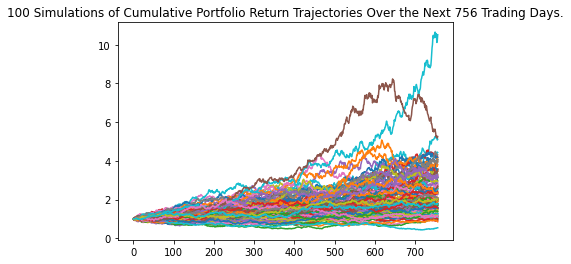

In [376]:
line_plot = MC_even_dist.plot_simulation()

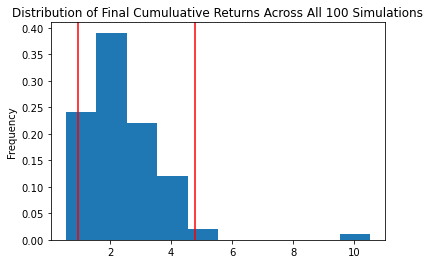

In [377]:
dist_plot = MC_even_dist.plot_distribution()

In [413]:
# Fetch summary statistics from the Monte Carlo simulation results
even_tbl = MC_even_dist.summarize_cumulative_return()

# Print summary statistics
print(even_tbl)

count           100.000000
mean              2.392585
std               1.316244
min               0.545194
25%               1.551306
50%               2.037604
75%               3.130832
max              10.517217
95% CI Lower      0.938054
95% CI Upper      4.790383
Name: 756, dtype: float64


In [379]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $15,000 investments in stocks
even_ci_lower = round(even_tbl[8]*15000,2)
even_ci_upper = round(even_tbl[9]*15000,2)

# Print results
print(f"There is a 95% chance that an initial investment of $15,000 in the portfolio"
      f" over the next 3 years will end within in the range of"
      f" ${even_ci_lower} and ${even_ci_upper}.")

There is a 95% chance that an initial investment of $15,000 in the portfolio over the next 3 years will end within in the range of $14070.82 and $71855.74.


In [388]:
# Configure a Monte Carlo simulation to forecast three years cumulative returns with 70% ARKK stock
MC_arkk = MCSimulation(
    portfolio_data = df_ticker,
    weights = [.7,.1,.1,.1],
    num_simulation = 100,
    num_trading_days = 252*3)

# Print the simulation input data
MC_arkk.portfolio_data.head()

ARKK                                                 GBTC  \
                 Open       High        Low      close daily_return   Open   
Date                                                                         
2019-01-02  36.270000  37.573002  36.230000  37.419998          NaN  4.155   
2019-01-03  37.000000  37.140999  35.910000  36.189999    -0.032870  4.325   
2019-01-04  36.900002  38.560001  36.860001  38.430000     0.061896  4.585   
2019-01-07  38.669998  40.330002  38.389999  40.099998     0.043456  4.740   
2019-01-08  40.709999  40.830002  39.307999  40.220001     0.002993  4.895   

                                             SP500                             \
            High   Low close daily_return     Open     High      Low    close   
Date                                                                            
2019-01-02  4.65  4.13  4.62          NaN  2476.96  2519.49  2467.47  2510.03   
2019-01-03  4.62  4.32  4.52    -0.021645  2491.92  2493.14  2443.96  2447.89   
2019-01-04  4.65  4.41  4.53     0.002212  2474.33  2538.07  2474.33  2531.94   
2019-01-07  4.94  4.74  4.86     0.072848  2535.61  2566.16  2524.56  2549.69   
2019-01-08  5.08  4.84  4.96     0.020576  2568.11  2579.82  2547.56  2574.41   

                              Nasdaq                                         \
           daily_return         Open         High          Low        close   
Date                                                                          
2019-01-02          NaN  6506.910156  6693.709961  6506.879883  6665.939941   
2019-01-03    -0.024757  6584.770020  6600.209961  6457.129883  6463.500000   
2019-01-04     0.034336  6567.140137  6760.689941  6554.240234  6738.859863   
2019-01-07     0.007010  6757.529785  6855.600098  6741.399902  6823.470215   
2019-01-08     0.009695  6893.439941  6909.580078  6795.859863  6897.000000   

                         
           daily_return  
Date                     
2019-01-02          NaN  
2019-01-03    -0.030369  
2019-01-04     0.042602  
2019-01-07     0.012556  
2019-01-08     0.010776

In [389]:
MC_arkk.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.000204,1.014699,0.983446,0.977393,1.007605,0.984035,0.959842,1.007067,0.988671,0.988778,...,0.979469,0.968050,0.985776,1.016088,0.993855,1.007031,0.979153,1.051090,1.010392,1.005411
2,0.983020,1.020353,0.957596,0.958063,0.965699,0.969072,0.991721,0.992612,1.021434,1.010326,...,0.961713,0.989560,0.988644,1.021683,1.001069,1.000556,0.998457,1.055294,1.018937,0.972803
3,0.990672,1.004297,0.957806,0.988858,0.979922,0.984051,1.030355,0.954770,1.013122,0.996108,...,1.005540,1.000804,0.973518,1.025750,1.022261,0.991885,1.025529,1.073393,1.025965,0.952632
4,0.999291,1.044439,0.983972,0.986512,0.957251,1.000323,1.032680,0.985152,1.005510,1.005357,...,0.977004,1.036785,0.981044,0.993496,1.050616,0.977597,1.019023,1.092118,1.008576,0.962140
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
752,1.306370,1.366653,0.802044,1.170898,2.013738,1.201669,1.159343,1.542290,1.481474,0.767458,...,2.943581,2.309911,1.845901,1.072434,0.460888,0.262243,2.372230,0.826957,2.356761,0.747410
753,1.289105,1.353823,0.798533,1.184171,1.999820,1.193190,1.173913,1.539865,1.448328,0.766734,...,2.826475,2.303570,1.879847,1.075087,0.465293,0.263414,2.432500,0.828993,2.368639,0.777663
754,1.279696,1.353211,0.794280,1.166939,2.048904,1.149721,1.137392,1.511845,1.435135,0.769717,...,2.881081,2.319192,1.885010,1.090646,0.470522,0.262102,2.451824,0.819249,2.354805,0.785592
755,1.290054,1.350284,0.805513,1.158917,2.085759,1.183461,1.121248,1.490970,1.442586,0.762485,...,3.059000,2.326720,1.818141,1.081909,0.445543,0.261257,2.472218,0.816903,2.382384,0.796745


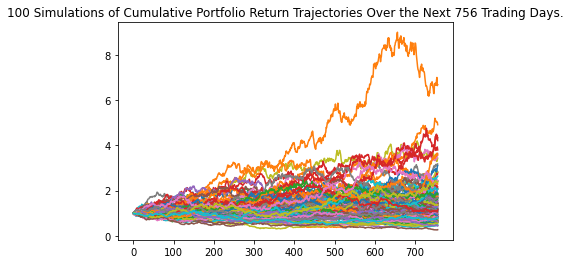

In [391]:
arkk_line_plot = MC_arkk.plot_simulation()

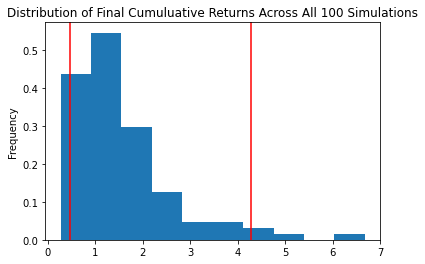

In [392]:
arkk_dist_plot = MC_arkk.plot_distribution()

In [414]:
# Fetch summary statistics from the Monte Carlo simulation results
arkk_tbl = MC_arkk.summarize_cumulative_return()

# Print summary statistics
print(arkk_tbl)

count           100.000000
mean              1.573009
std               1.058179
min               0.270018
25%               0.854008
50%               1.316138
75%               1.842112
max               6.680274
95% CI Lower      0.470237
95% CI Upper      4.271474
Name: 756, dtype: float64


In [399]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $15,000 investments
arkk_ci_lower = round(arkk_tbl[8]*15000,2)
arkk_ci_upper = round(arkk_tbl[9]*15000,2)

# Print results
print(f"There is a 95% chance that an initial investment of $15,000 in the portfolio"
      f" over the next 3 years will end within in the range of"
      f" ${arkk_ci_lower} and ${arkk_ci_upper}.")

There is a 95% chance that an initial investment of $15,000 in the portfolio over the next 3 years will end within in the range of $7053.55 and $64072.11.


In [400]:
# Configure a Monte Carlo simulation to forecast five years cumulative returns with 60% Nike stock
MC_gbtc = MCSimulation(
    portfolio_data = df_ticker,
    weights = [.1,.7,.1,.1],
    num_simulation = 100,
    num_trading_days = 252*3
)

# Printing the simulation input data
MC_gbtc.portfolio_data.head()

ARKK                                                 GBTC  \
                 Open       High        Low      close daily_return   Open   
Date                                                                         
2019-01-02  36.270000  37.573002  36.230000  37.419998          NaN  4.155   
2019-01-03  37.000000  37.140999  35.910000  36.189999    -0.032870  4.325   
2019-01-04  36.900002  38.560001  36.860001  38.430000     0.061896  4.585   
2019-01-07  38.669998  40.330002  38.389999  40.099998     0.043456  4.740   
2019-01-08  40.709999  40.830002  39.307999  40.220001     0.002993  4.895   

                                             SP500                             \
            High   Low close daily_return     Open     High      Low    close   
Date                                                                            
2019-01-02  4.65  4.13  4.62          NaN  2476.96  2519.49  2467.47  2510.03   
2019-01-03  4.62  4.32  4.52    -0.021645  2491.92  2493.14  2443.96  2447.89   
2019-01-04  4.65  4.41  4.53     0.002212  2474.33  2538.07  2474.33  2531.94   
2019-01-07  4.94  4.74  4.86     0.072848  2535.61  2566.16  2524.56  2549.69   
2019-01-08  5.08  4.84  4.96     0.020576  2568.11  2579.82  2547.56  2574.41   

                              Nasdaq                                         \
           daily_return         Open         High          Low        close   
Date                                                                          
2019-01-02          NaN  6506.910156  6693.709961  6506.879883  6665.939941   
2019-01-03    -0.024757  6584.770020  6600.209961  6457.129883  6463.500000   
2019-01-04     0.034336  6567.140137  6760.689941  6554.240234  6738.859863   
2019-01-07     0.007010  6757.529785  6855.600098  6741.399902  6823.470215   
2019-01-08     0.009695  6893.439941  6909.580078  6795.859863  6897.000000   

                         
           daily_return  
Date                     
2019-01-02          NaN  
2019-01-03    -0.030369  
2019-01-04     0.042602  
2019-01-07     0.012556  
2019-01-08     0.010776

In [401]:
MC_gbtc.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.028242,1.021317,0.976458,1.056333,1.023472,1.043489,1.015411,1.003489,1.012645,1.053552,...,1.080677,1.108141,0.982047,0.992025,0.997410,1.010597,0.899772,0.989912,1.015190,0.989889
2,1.014137,1.052500,0.963676,1.070315,0.996865,1.019039,1.060079,1.035960,1.071872,0.978909,...,1.134099,1.078635,1.056413,1.013103,1.038500,0.902739,0.844014,1.001412,0.993104,0.932913
3,1.048914,1.055577,0.939603,1.031370,0.949885,1.022586,1.030110,1.008644,1.127119,1.075131,...,1.213936,1.088529,1.035493,1.013539,1.066996,0.916186,0.801300,1.028611,1.011391,0.953992
4,0.970773,1.032944,0.899388,1.015317,0.960431,1.018584,1.043285,0.970863,1.120847,1.147136,...,1.233973,1.114607,1.070854,0.966825,1.008396,0.882102,0.839089,1.075383,0.974992,0.977557
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
752,2.212189,6.746963,10.548071,4.857204,9.828513,0.922818,4.682396,4.583371,4.409038,2.484958,...,2.177098,4.626910,2.922920,9.699616,22.486817,4.700632,3.259166,10.460104,4.066159,3.918608
753,2.329680,7.103469,10.343456,4.751405,9.752775,0.945058,4.719192,4.300951,4.334342,2.488005,...,2.043255,4.915035,2.979798,9.974028,22.849138,5.104709,3.330644,10.667080,4.024118,4.160306
754,2.329275,7.620023,10.238306,4.625967,9.761729,0.997460,4.594823,4.159063,4.196839,2.496999,...,2.052164,5.052922,2.960141,9.496725,22.446913,5.118026,3.365505,10.742032,3.962027,4.048797
755,2.276747,7.757012,9.932449,4.689772,10.311690,0.982028,4.482761,4.184813,4.107344,2.592118,...,2.133581,4.588213,3.108794,8.938651,23.472039,5.121808,3.495322,10.971610,4.172689,4.142287


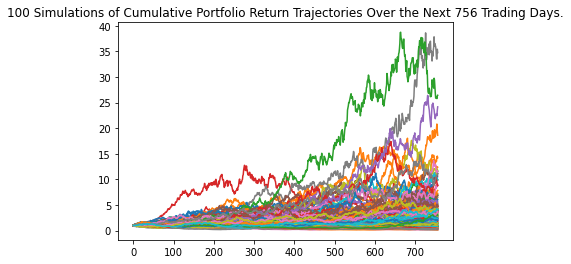

In [402]:
gbtc_line_plot = MC_gbtc.plot_simulation()

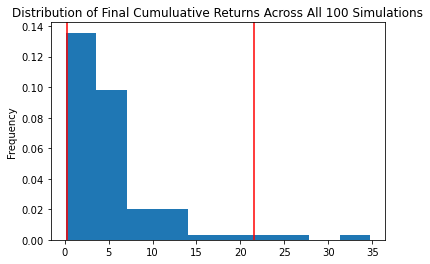

In [403]:
gbtc_dist_plot = MC_gbtc.plot_distribution()

In [415]:
gbtc_tbl = MC_gbtc.summarize_cumulative_return()

# Print summary statistics
print(gbtc_tbl)

count           100.000000
mean              4.965115
std               5.506587
min               0.124704
25%               1.505898
50%               3.663639
75%               5.569083
max              34.769446
95% CI Lower      0.252419
95% CI Upper     21.532679
Name: 756, dtype: float64


In [408]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $15,000 investments
gbtc_ci_lower = round(gbtc_tbl[8]*15000,2)
gbtc_ci_upper = round(gbtc_tbl[9]*15000,2)

# Print results
print(f"There is a 95% chance that an initial investment of $15,000 in the portfolio"
      f" over the next 3 years will end within in the range of"
      f" ${gbtc_ci_lower} and ${gbtc_ci_upper}.")

There is a 95% chance that an initial investment of $15,000 in the portfolio over the next 3 years will end within in the range of $3786.28 and $322990.18.


In [411]:
# assign data of lists.  
data = {'Name': ['Evenly Distributed', '70% ARKK', '70% GBTC'], 'High': [even_ci_upper,arkk_ci_upper,gbtc_ci_upper], 'Low': [even_ci_lower,arkk_ci_lower,gbtc_ci_lower]}  
  
# Create DataFrame  
df = pd.DataFrame(data)  
  
# Print the output.  
print("If you invest $15000, in 3 years you get the following:")
print(df)  

If you invest $15000, in 3 years you get the following:
                 Name       High       Low
0  Evenly Distributed   71855.74  14070.82
1            70% ARKK   64072.11   7053.55
2            70% GBTC  322990.18   3786.28
